In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Wine Datasets

In [3]:
df_red = pd.read_csv("../data/wine+quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("../data/wine+quality/winequality-white.csv", delimiter=";")

# 1. EDA

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_red.shape

(1599, 12)

In [8]:
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
df_white.shape

(4898, 12)

In [14]:
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Visualizing correlation matrix's

In [16]:
# Function to visualize correlation matrix
def plot_corr(dataframe:pd.DataFrame, title:str, figsize:tuple=(6,6), tickfont:int=9, tickrotation:int=90, ticklabelsize:int=14, titlefont:int=16) -> None:
    f = plt.figure(figsize=figsize)
    plt.matshow(dataframe.corr(), fignum=f.number)
    plt.xticks(range(dataframe.select_dtypes(['number']).shape[1]),
               dataframe.select_dtypes(['number']).columns,
               fontsize=tickfont,
               rotation=tickrotation)
    plt.yticks(range(dataframe.select_dtypes(['number']).shape[1]),
               dataframe.select_dtypes(['number']).columns,
               fontsize=tickfont)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=ticklabelsize)
    plt.title(title,fontsize=titlefont)

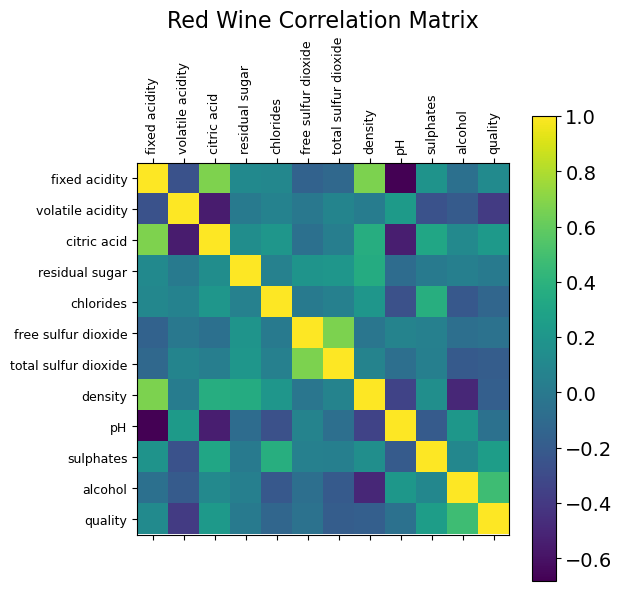

In [17]:
plot_corr(df_red, "Red Wine Correlation Matrix")

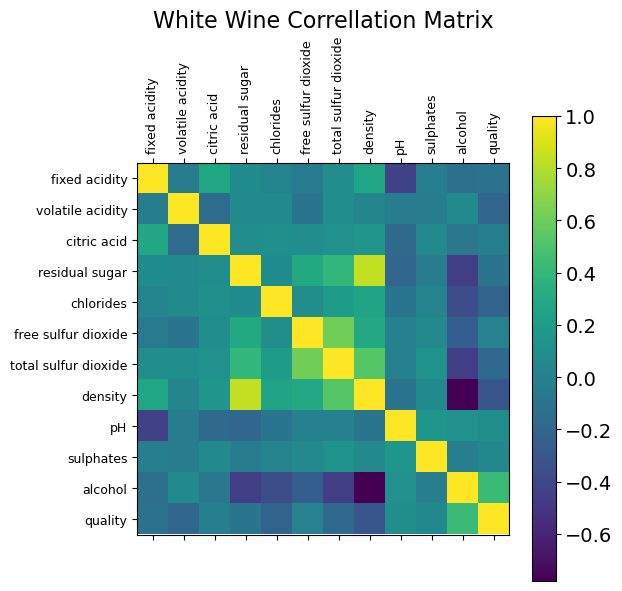

In [18]:
plot_corr(df_white, "White Wine Correllation Matrix")

# 2. Modeling

In [19]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings

In [20]:
warnings.filterwarnings('ignore')

Function to report and visualize confusion matrix

In [21]:
def cm_report(y_test:np.array, y_pred:np.array) -> None:
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title("Confusion Matrix")
    print(classification_report(y_test, y_pred))

Splitting the Red Wine Dataset into test and train datasets with respective targets(quality)

In [22]:
X = df_red[df_red.columns.difference(["quality"])]
y = df_red["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=10)

In [23]:
print(X_train.shape, y_train.shape)

(1199, 11) (1199,)


In [24]:
print(X_test.shape, y_test.shape)

(400, 11) (400,)


**2.1 Initialising scaler function for pipeline**

In [25]:
scaler = StandardScaler()

**2.2 Training Linear Models**
1. Logistic Regression (Regularised)

In [26]:
model = LogisticRegression(max_iter=100, tol=0.1)
pipe_log_reg = make_pipeline(scaler, model)
pipe_log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(tol=0.1))])

Evaluating Logistic Regression

In [27]:
pipe_log_reg.score(X_test, y_test)

0.59

Logistic Regression Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.08      0.14        13
           5       0.65      0.75      0.70       170
           6       0.54      0.59      0.56       160
           7       0.45      0.28      0.35        50
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.44      0.28      0.29       400
weighted avg       0.58      0.59      0.57       400



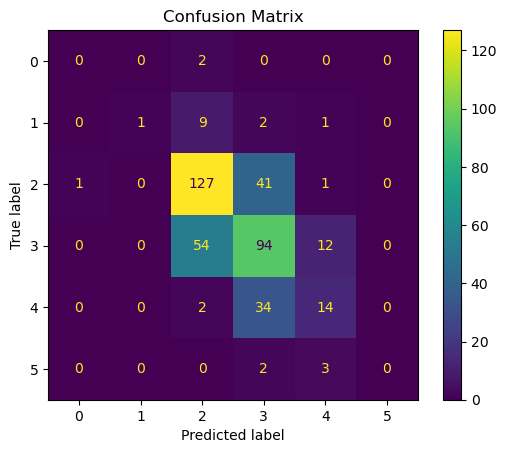

In [28]:
y_pred = pipe_log_reg.predict(X_test)
cm_report(y_test, y_pred)

2. SVM (Linear Kernel)

In [29]:
model = svm.SVC(kernel="linear")
pipe_svm_linear = make_pipeline(scaler, model)
pipe_svm_linear.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

Evaluating SVM (Linear Kernel)

In [30]:
pipe_svm_linear.score(X_test, y_test)

0.5875

SVM (Linear Kernel) Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.65      0.77      0.71       170
           6       0.52      0.65      0.58       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.20      0.24      0.21       400
weighted avg       0.49      0.59      0.53       400



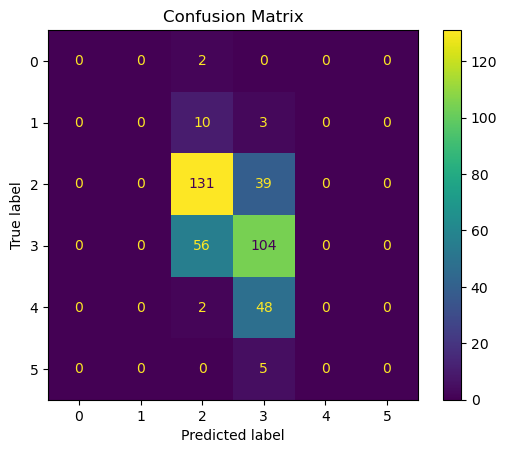

In [31]:
y_pred = pipe_svm_linear.predict(X_test)
cm_report(y_test, y_pred)

**2.3 Training Non-Linear Models**
1. Random Forest Classifier

In [32]:
model = RandomForestClassifier(n_estimators=50, random_state=1)
pipe_random_forest = make_pipeline(scaler, model)
pipe_random_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

Evaluating Random Forest Classifier

In [33]:
pipe_random_forest.score(X_test, y_test)

0.7

Random Forest Classifier Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.75      0.85      0.79       170
           6       0.66      0.69      0.68       160
           7       0.67      0.48      0.56        50
           8       0.33      0.20      0.25         5

    accuracy                           0.70       400
   macro avg       0.40      0.37      0.38       400
weighted avg       0.67      0.70      0.68       400



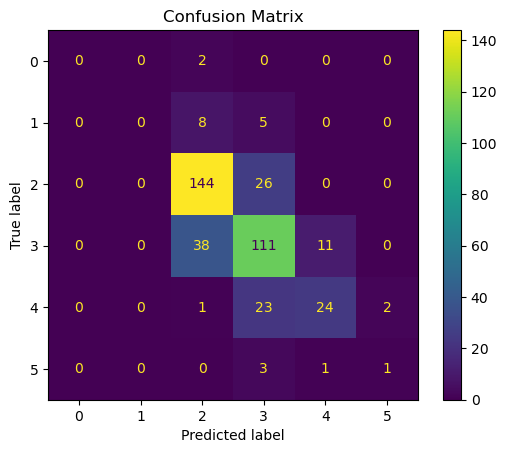

In [34]:
y_pred = pipe_random_forest.predict(X_test)
cm_report(y_test, y_pred)

2. SVM (rbf Kernel)

In [35]:
model = svm.SVC(kernel="rbf")
pipe_svm_rbf = make_pipeline(scaler, model)
pipe_svm_rbf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Evaluating SVM (rbf Kernel)

In [36]:
pipe_svm_rbf.score(X_test, y_test)

0.6075

SVM (rbf Kernel) Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.64      0.78      0.70       170
           6       0.56      0.60      0.58       160
           7       0.60      0.30      0.40        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.30      0.28      0.28       400
weighted avg       0.57      0.61      0.58       400



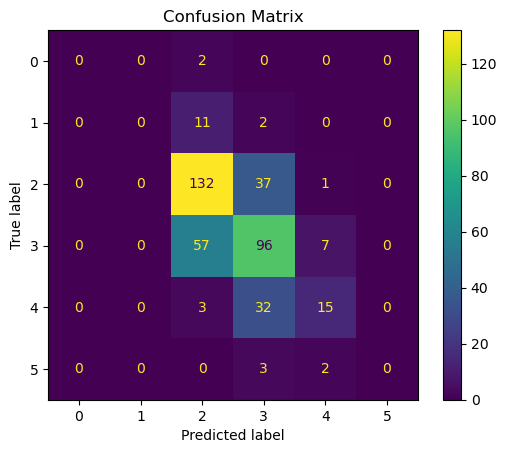

In [37]:
y_pred = pipe_svm_rbf.predict(X_test)
cm_report(y_test, y_pred)

3. SVM (poly Kernel)

In [38]:
model = svm.SVC(kernel="poly")
pipe_svm_poly = make_pipeline(scaler, model)
pipe_svm_poly.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

Evaluating SVM (poly Kernel)

In [39]:
pipe_svm_poly.score(X_test, y_test)

0.61

SVM (poly Kernel) Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.65      0.80      0.72       170
           6       0.57      0.59      0.58       160
           7       0.54      0.26      0.35        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.29      0.28      0.28       400
weighted avg       0.57      0.61      0.58       400



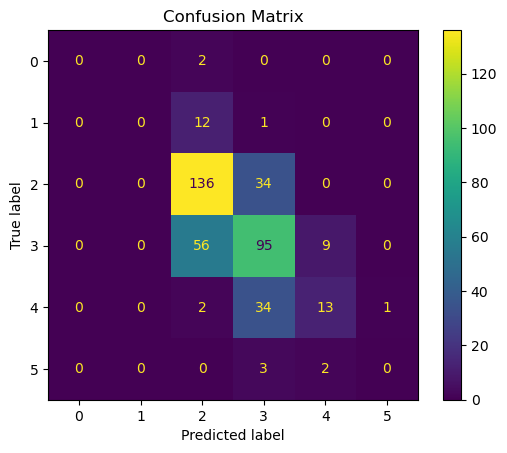

In [40]:
y_pred = pipe_svm_poly.predict(X_test)
cm_report(y_test, y_pred)

# 3. Hyperparameter Tuning

**Experimenting with GridSearch for Hyperparameter Tuning with Logistic Regression**

In [41]:
scalar = StandardScaler()

model = LogisticRegression(max_iter=1000, tol=0.1)

pipe = Pipeline(steps=[('scaler', scalar),
                         ('model', model)])

param_grid = {
    'model__C': np.logspace(-1, 10, 10),
    'model__class_weight':['balanced', None]
    
}
search = GridSearchCV(pipe, 
                      param_grid,
                      scoring='f1_weighted',
                      cv=5,
                      n_jobs=-1
                     )

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-01, 1.66810054e+00, 2.78255940e+01, 4.64158883e+02,
       7.74263683e+03, 1.29154967e+05, 2.15443469e+06, 3.59381366e+07,
       5.99484250e+08, 1.00000000e+10]),
                         'model__class_weight': ['balanced', None]},
             scoring='f1_weighted')

In [42]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.579):
{'model__C': 1.6681005372000592, 'model__class_weight': None}


**Appling GridSearch for Hyperparameter Tuning on Random Forest Classifier**

In [43]:
scalar = StandardScaler()
model = RandomForestClassifier(random_state=1)

pipe = Pipeline(steps=[('scaler', scalar),
                         ('model', model)])

param_grid = {
    "model__n_estimators": np.linspace(10, 100, 20, dtype=int),
    "model__max_features": ["sqrt", "log2", None],
    "model__max_depth": np.linspace(10, 100, 10, dtype=int),
    "model__criterion": ["gini", "entropy"]
}

search = GridSearchCV(pipe, 
                      param_grid,
                      scoring='f1_weighted',
                      cv=5,
                      n_jobs=-1
                     )

search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__n_estimators': array([ 10,  14,  19,  24,  28,  33,  38,  43,  47,  52,  57,  62,  66,
        71,  76,  81,  85,  90,  95, 100])},
             scoring='f1_weighted')

Random Forest Classifier: Best parameters from GridSearch

In [44]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.648):
{'model__criterion': 'gini', 'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__n_estimators': 90}


# 4. Wine Quality Recommender

**Training Random Forest Classifier with Best Parameters from GridSearch**

In [45]:
model_rfc = RandomForestClassifier(n_estimators=90, max_features="sqrt", max_depth=20, criterion="gini")

pipe = make_pipeline(scalar, model_rfc)

model = pipe.fit(X_train, y_train)

Evaluating Trained RFC Model

In [46]:
model.score(X_test, y_test)

0.7025

Trained Model Confusion Matrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.75      0.86      0.80       170
           6       0.68      0.70      0.69       160
           7       0.63      0.44      0.52        50
           8       0.25      0.20      0.22         5

    accuracy                           0.70       400
   macro avg       0.38      0.37      0.37       400
weighted avg       0.67      0.70      0.68       400



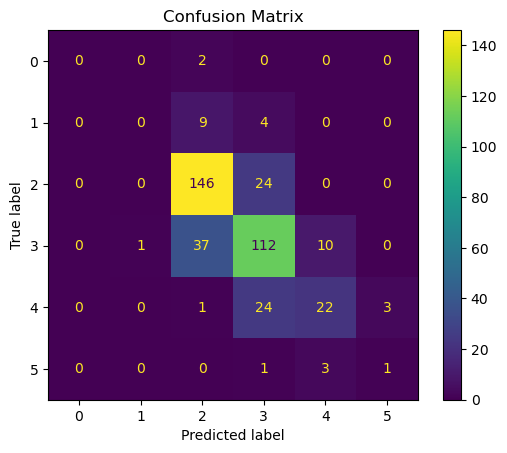

In [47]:
y_pred = model.predict(X_test)
cm_report(y_test, y_pred)

**Wine Quality Predictor Function**

In [48]:
# Function to predict the wine quality
def wine_quality(row:np.array, model:Pipeline) -> int:
    """
    Input:
        row: np array of test feature data
        model: trained model pipeline
    Output:
        result: wine quality as int
    """

    result = model.predict(row)[0]

    return result

Testing wine quality predictor function

In [49]:
row = X_test.iloc[[6]] # single test data row

result = wine_quality(row, model)

print(result)

6
